In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets
from torchvision import transforms

import numpy as np
from tqdm import tqdm
import math

import random

import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose([
                    transforms.ToTensor(), 
                    # transforms.Normalize((0.5,), (0.5,)),
            ])

RandPercent = 0
def randomLabels(y):
    if random.random() <= RandPercent:
        return random.randint(0,9)
    return y

In [ ]:
def CreateDataLoaders(Option, p_BatchSize, RandomNoisePerc = None):
    if Option == 1:
        train_dataset = datasets.MNIST("./", train=True, transform = transform, download=True)
        train_subset, val_subset = torch.utils.data.random_split(train_dataset, [int(len(train_dataset) * 0.85), int(len(train_dataset) * 0.15)], generator=torch.Generator().manual_seed(1))
        test_dataset = datasets.MNIST("./", train=False, transform = transform, download=True)
    elif Option == 2:
        train_dataset = datasets.FashionMNIST("./", train=True, transform = transform, download=True)
        train_subset, val_subset = torch.utils.data.random_split(train_dataset, [int(len(train_dataset) * 0.85), int(len(train_dataset) * 0.15)], generator=torch.Generator().manual_seed(1))
        test_dataset = datasets.FashionMNIST("./", train=False, transform = transform, download=True)
    
    elif Option == 5:
        train_dataset = datasets.CIFAR10("./", train=True, transform = transform, download=True)
        train_subset, val_subset = torch.utils.data.random_split(train_dataset, [int(len(train_dataset) * 0.85), int(len(train_dataset) * 0.15)], generator=torch.Generator().manual_seed(1))
        test_dataset = datasets.CIFAR10("./", train=False, transform = transform, download=True)

    elif Option == 6:
        train_dataset = datasets.CIFAR100("./", train=True, transform = transform, download=True)
        train_subset, val_subset = torch.utils.data.random_split(train_dataset, [int(len(train_dataset) * 0.85), int(len(train_dataset) * 0.15)], generator=torch.Generator().manual_seed(1))
        test_dataset = datasets.CIFAR100("./", train=False, transform = transform, download=True)

    elif Option == 7:
        RandPercent = RandomNoisePerc
        train_dataset = datasets.CIFAR10("./", train=True, transform = transform, target_transform = randomLabels, download=True)
        train_subset, val_subset = torch.utils.data.random_split(train_dataset, [int(len(train_dataset) * 0.85), int(len(train_dataset) * 0.15)], generator=torch.Generator().manual_seed(1))
        test_dataset = datasets.CIFAR10("./", train=False, transform = transform, download=True)
    
    Train_DataLoader = torch.utils.data.DataLoader(train_subset, batch_size = p_BatchSize, shuffle = True)
    Val_DataLoader = torch.utils.data.DataLoader(val_subset, batch_size = p_BatchSize, shuffle = True)
    Test_DataLoader = torch.utils.data.DataLoader(test_dataset, batch_size = p_BatchSize, shuffle = True)

    return Train_DataLoader, Val_DataLoader, Test_DataLoader

In [ ]:
def GetBatchData(X, Y, BatchIdx, BatchSize):
    tmpX = torch.tensor(X[BatchIdx*BatchSize: BatchIdx*BatchSize + BatchSize])
    tmpY = torch.tensor(Y[BatchIdx*BatchSize: BatchIdx*BatchSize + BatchSize])

    return tmpX, tmpY

In [ ]:
def PlotGraph(X, Y1, Y2):
    plt.plot(X, Y1, label = 'Train')
    plt.plot(X, Y2, label = "Val")

    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

    plt.legend(loc='best')
    plt.show()

In [ ]:
# class AllConv(nn.Module):
#     def __init__(self, OutputDim):
#         super(AllConv, self).__init__()
#         # self.InputDim = InputDim
#         self.OutputDim = OutputDim
        
#         self.Conv1 = nn.Conv2d(3, 96, kernel_size = 3)
#         self.Conv2 = nn.Conv2d(96, 96, kernel_size = 3)
#         self.Conv3 = nn.Conv2d(96, 96, kernel_size = 3, stride = 2)
#         self.Conv4 = nn.Conv2d(96, 192, kernel_size = 3)
#         self.Conv5 = nn.Conv2d(192, 192, kernel_size = 3)
#         self.Conv6 = nn.Conv2d(192, 192, kernel_size = 3, stride = 2)
#         self.Conv7 = nn.Conv2d(192, 192, kernel_size = 3)
#         self.Conv8 = nn.Conv2d(192, 192, kernel_size = 1)
#         self.Conv9 = nn.Conv2d(192, self.OutputDim, kernel_size = 1)

#         self.AvgPool = nn.AvgPool2d(kernel_size = 2) # In Paper it is mentioned to avg pool on 6 x 6

#         self.ActFunc = nn.functional.relu
#         # self.batch = nn.BatchNorm1d(800)
#         self.SftMax = nn.functional.softmax

#     def forward(self, x):
#         # print(x.shape)
#         x = self.ActFunc(self.Conv1(x))
#         # print(x.shape)
#         x = self.ActFunc(self.Conv2(x))
#         # print(x.shape)
#         x = self.ActFunc(self.Conv3(x))
#         # print(x.shape)
#         x = self.ActFunc(self.Conv4(x))
#         # print(x.shape)
#         x = self.ActFunc(self.Conv5(x))
#         # print(x.shape)
#         x = self.ActFunc(self.Conv6(x))
#         # print(x.shape)
#         x = self.ActFunc(self.Conv7(x))
#         # print(x.shape)
#         x = self.ActFunc(self.Conv8(x))
#         # print(x.shape)
#         x = self.ActFunc(self.Conv9(x))
#         # print(x.shape)
#         # print("Conv done")
#         x = self.AvgPool(x)
#         # print(x.shape)
        
#         return x

In [ ]:
class AllConv(nn.Module):
    def __init__(self, OutputDim):
        super(AllConv, self).__init__()
        # self.InputDim = InputDim
        self.OutputDim = OutputDim
        
        self.Conv1 = nn.Conv2d(3, 10, kernel_size = 3) # 32*32*3 -> 15*15*3
        self.Conv2 = nn.Conv2d(10, 20, kernel_size = 3, stride = 2) # 30*30*3 -> 14*14*3
        self.Conv3 = nn.Conv2d(20, 35, kernel_size = 3, stride = 2) # 14*14*3 -> 6*6*3
        self.Conv4 = nn.Conv2d(35, 50, kernel_size = 3, stride = 2) # 6*6*3 -> 2*2*3
        self.Conv5 = nn.Conv2d(50, self.OutputDim, kernel_size = 2) # 2*2*3 -> 1*1*Out

        # self.Conv1 = nn.Conv2d(3, 96, kernel_size = 3)
        # self.Conv2 = nn.Conv2d(96, 96, kernel_size = 3)
        # self.Conv3 = nn.Conv2d(96, 96, kernel_size = 3, stride = 2)
        # self.Conv4 = nn.Conv2d(96, 192, kernel_size = 3)
        # self.Conv5 = nn.Conv2d(192, 192, kernel_size = 3)
        # self.Conv6 = nn.Conv2d(192, 192, kernel_size = 3, stride = 2)
        # self.Conv7 = nn.Conv2d(192, 192, kernel_size = 3)
        # self.Conv8 = nn.Conv2d(192, 192, kernel_size = 1)
        # self.Conv9 = nn.Conv2d(192, self.OutputDim, kernel_size = 1)

        # self.AvgPool = nn.AvgPool2d(kernel_size = 2) # In Paper it is mentioned to avg pool on 6 x 6

        self.ActFunc = nn.functional.relu
        # self.batch = nn.BatchNorm1d(800)
        # self.SftMax = nn.Softmax

    def forward(self, x):
        # print(x.shape)
        x = self.ActFunc(self.Conv1(x))
        # print(x.shape)
        x = self.ActFunc(self.Conv2(x))
        # print(x.shape)
        x = self.ActFunc(self.Conv3(x))
        # print(x.shape)
        x = self.ActFunc(self.Conv4(x))
        # print(x.shape)
        x = self.ActFunc(self.Conv5(x))
        # print(x.shape)
        # x = self.ActFunc(self.Conv6(x))
        # # print(x.shape)
        # x = self.ActFunc(self.Conv7(x))
        # # print(x.shape)
        # x = self.ActFunc(self.Conv8(x))
        # # print(x.shape)
        # x = self.ActFunc(self.Conv9(x))
        # # print(x.shape)
        # # print("Conv done")
        # x = self.AvgPool(x)
        # print(x.shape)
        
        return x

In [ ]:
def TrainModel(p_model, loss_criteria, Optimizer, device,  p_TrainDL = None, Gamma = 5):
    TrainCorr = 0
    TotNumOfSamples = 0

    if p_TrainDL != None:
        for images, labels in tqdm(p_TrainDL):
            Optimizer.zero_grad()

            images = images.to(device)
            labels = labels.to(device)

            pred = p_model(images)
            pred = pred.reshape(pred.shape[0], -1)
            predClass = torch.max(pred.data, 1)[1]

            loss = loss_criteria(pred, labels)
            TrainCorr += (predClass==labels).sum()
            TotNumOfSamples += len(labels)

            loss.backward()
            Optimizer.step()

    return TrainCorr/TotNumOfSamples

def EvaluateModel(p_model, p_loader, device):
    Correct = 0
    TotalNumOfSamples = 0

    for images, labels in tqdm(p_loader):
        images = images.to(device)
        labels = labels.to(device)

        pred = p_model(images)
        pred = pred.reshape(pred.shape[0], -1)
        # print(pred.shape)
        predClass = torch.max(pred.data, 1)[1]
        Correct += (predClass==labels).sum()
        TotalNumOfSamples += len(labels)
        # print(predClass)
        # print(labels)
        # print(predClass==labels)
        # print("Correct", Correct, " Out of", TotalNumOfSamples)
        # loss = loss_criteria(predClass, labels)
        # Accuracy += loss.cpu().data.item()

    # print("Correct", Correct, " Out of", TotalNumOfSamples)
    return Correct/TotalNumOfSamples

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 50

Epoch_List = [i+1 for i in range(EPOCHS)]

In [ ]:
# -------------------------------------------- CIFAR-10 Dataset -----------------------------------------------------------
Option = 5
Train_DataLoader, Val_DataLoader, Test_DataLoader = CreateDataLoaders(Option, 64)
ModelName = "Model_AllConv_CIFAR10.pt"

model = AllConv(10).to(device)
loss_criteria = nn.CrossEntropyLoss()
AdamOpt = torch.optim.Adam(model.parameters(), lr=0.0001)

ValAccuracy = 0
TrainAcc_List = []
ValAcc_List = []

saved = False
if saved == True:
    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)
else:
    model.train()
    Train_Accuracy = 0

    for e in range(EPOCHS):
        Train_Accuracy = TrainModel(model, loss_criteria, AdamOpt, device, Train_DataLoader)
        val_acc = EvaluateModel(model, Val_DataLoader, device)

        TrainAcc_List.append(Train_Accuracy.cpu().item())
        ValAcc_List.append(val_acc.cpu().item())

        print("EPOCH - ", e+1, ". Train Accuracy = ", Train_Accuracy.cpu().item(), ", Validation Accuracy = ", val_acc.cpu().item())
        
        if val_acc.cpu().item() > ValAccuracy:
            print("Model Re-Saved")
            ValAccuracy = val_acc.cpu().item()
            torch.save(model, ModelName)

    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)


print()

Train_Accuracy = EvaluateModel(saved_model, Train_DataLoader, device)
print("Train Accuracy = ", Train_Accuracy.cpu().item())
Test_Accuracy = EvaluateModel(saved_model, Test_DataLoader, device)
print("Test Accuracy = ", Test_Accuracy.cpu().item())

print("Generalization Gap = ", (Train_Accuracy.cpu().item() - Test_Accuracy.cpu().item()))

100%|██████████| 170498071/170498071 [00:05<00:00, 31556757.28it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


100%|██████████| 118/118 [00:01<00:00, 94.88it/s]


EPOCH -  1 . Train Accuracy =  0.202752947807312 , Validation Accuracy =  0.24426667392253876
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.47it/s]


EPOCH -  2 . Train Accuracy =  0.26682353019714355 , Validation Accuracy =  0.27693334221839905
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.94it/s]


EPOCH -  3 . Train Accuracy =  0.3008941113948822 , Validation Accuracy =  0.3049333393573761
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 74.24it/s]


EPOCH -  4 . Train Accuracy =  0.31647059321403503 , Validation Accuracy =  0.31520000100135803
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.03it/s]


EPOCH -  5 . Train Accuracy =  0.32665881514549255 , Validation Accuracy =  0.3233333230018616
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 88.55it/s]


EPOCH -  6 . Train Accuracy =  0.33592942357063293 , Validation Accuracy =  0.33160001039505005
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.04it/s]


EPOCH -  7 . Train Accuracy =  0.3417647182941437 , Validation Accuracy =  0.33560001850128174
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.27it/s]


EPOCH -  8 . Train Accuracy =  0.34934118390083313 , Validation Accuracy =  0.34746667742729187
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 70.34it/s]


EPOCH -  9 . Train Accuracy =  0.3518117666244507 , Validation Accuracy =  0.3450666666030884


100%|██████████| 118/118 [00:01<00:00, 92.93it/s]


EPOCH -  10 . Train Accuracy =  0.35903528332710266 , Validation Accuracy =  0.3555999994277954
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.94it/s]


EPOCH -  11 . Train Accuracy =  0.36444705724716187 , Validation Accuracy =  0.3630666732788086
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.55it/s]


EPOCH -  12 . Train Accuracy =  0.36800000071525574 , Validation Accuracy =  0.3569333255290985


100%|██████████| 118/118 [00:01<00:00, 93.93it/s]


EPOCH -  13 . Train Accuracy =  0.3714117705821991 , Validation Accuracy =  0.36746665835380554
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.70it/s]


EPOCH -  14 . Train Accuracy =  0.3764705955982208 , Validation Accuracy =  0.36720001697540283


100%|██████████| 118/118 [00:01<00:00, 66.39it/s]


EPOCH -  15 . Train Accuracy =  0.37896472215652466 , Validation Accuracy =  0.3713333308696747
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 95.51it/s]


EPOCH -  16 . Train Accuracy =  0.3796941339969635 , Validation Accuracy =  0.3738666772842407
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.98it/s]


EPOCH -  17 . Train Accuracy =  0.3847764730453491 , Validation Accuracy =  0.3789333403110504
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.48it/s]


EPOCH -  18 . Train Accuracy =  0.38614118099212646 , Validation Accuracy =  0.3786666691303253


100%|██████████| 118/118 [00:01<00:00, 93.95it/s]


EPOCH -  19 . Train Accuracy =  0.3878588378429413 , Validation Accuracy =  0.3831999897956848
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 80.78it/s]


EPOCH -  20 . Train Accuracy =  0.3903999924659729 , Validation Accuracy =  0.38306668400764465


100%|██████████| 118/118 [00:01<00:00, 84.85it/s]


EPOCH -  21 . Train Accuracy =  0.39254117012023926 , Validation Accuracy =  0.365200012922287


100%|██████████| 118/118 [00:01<00:00, 94.62it/s]


EPOCH -  22 . Train Accuracy =  0.39477646350860596 , Validation Accuracy =  0.38866665959358215
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.89it/s]


EPOCH -  23 . Train Accuracy =  0.39505884051322937 , Validation Accuracy =  0.3861333429813385


100%|██████████| 118/118 [00:01<00:00, 92.85it/s]


EPOCH -  24 . Train Accuracy =  0.39797648787498474 , Validation Accuracy =  0.3930666744709015
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 95.31it/s]


EPOCH -  25 . Train Accuracy =  0.40018823742866516 , Validation Accuracy =  0.39293333888053894


100%|██████████| 118/118 [00:01<00:00, 64.43it/s]


EPOCH -  26 . Train Accuracy =  0.40148234367370605 , Validation Accuracy =  0.3919999897480011


100%|██████████| 118/118 [00:01<00:00, 91.75it/s]


EPOCH -  27 . Train Accuracy =  0.4044705927371979 , Validation Accuracy =  0.3887999951839447


100%|██████████| 118/118 [00:01<00:00, 93.97it/s]


EPOCH -  28 . Train Accuracy =  0.4044470489025116 , Validation Accuracy =  0.38813334703445435


100%|██████████| 118/118 [00:01<00:00, 94.54it/s]


EPOCH -  29 . Train Accuracy =  0.40562352538108826 , Validation Accuracy =  0.39399999380111694
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.71it/s]


EPOCH -  30 . Train Accuracy =  0.4071294069290161 , Validation Accuracy =  0.39693334698677063
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 71.71it/s]


EPOCH -  31 . Train Accuracy =  0.40788236260414124 , Validation Accuracy =  0.39480000734329224


100%|██████████| 118/118 [00:01<00:00, 93.52it/s]


EPOCH -  32 . Train Accuracy =  0.41122353076934814 , Validation Accuracy =  0.39453333616256714


100%|██████████| 118/118 [00:01<00:00, 92.58it/s]


EPOCH -  33 . Train Accuracy =  0.41070589423179626 , Validation Accuracy =  0.3991999924182892
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 95.48it/s]


EPOCH -  34 . Train Accuracy =  0.41122353076934814 , Validation Accuracy =  0.39959999918937683
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.70it/s]


EPOCH -  35 . Train Accuracy =  0.4136941134929657 , Validation Accuracy =  0.39559999108314514


100%|██████████| 118/118 [00:01<00:00, 92.04it/s]


EPOCH -  36 . Train Accuracy =  0.4149411916732788 , Validation Accuracy =  0.39746665954589844


100%|██████████| 118/118 [00:01<00:00, 73.01it/s]


EPOCH -  37 . Train Accuracy =  0.4163764715194702 , Validation Accuracy =  0.40119999647140503
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 89.87it/s]


EPOCH -  38 . Train Accuracy =  0.41792941093444824 , Validation Accuracy =  0.39853334426879883


100%|██████████| 118/118 [00:01<00:00, 93.61it/s]


EPOCH -  39 . Train Accuracy =  0.41778823733329773 , Validation Accuracy =  0.40666666626930237
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.08it/s]


EPOCH -  40 . Train Accuracy =  0.42002353072166443 , Validation Accuracy =  0.4030666649341583


100%|██████████| 118/118 [00:01<00:00, 93.93it/s]


EPOCH -  41 . Train Accuracy =  0.4202117621898651 , Validation Accuracy =  0.4046666622161865


100%|██████████| 118/118 [00:01<00:00, 64.82it/s]


EPOCH -  42 . Train Accuracy =  0.42270588874816895 , Validation Accuracy =  0.4073333442211151
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 88.19it/s]


EPOCH -  43 . Train Accuracy =  0.42350587248802185 , Validation Accuracy =  0.408133327960968
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.91it/s]


EPOCH -  44 . Train Accuracy =  0.4234117567539215 , Validation Accuracy =  0.4054666757583618


100%|██████████| 118/118 [00:01<00:00, 95.53it/s]


EPOCH -  45 . Train Accuracy =  0.4245647192001343 , Validation Accuracy =  0.408133327960968


100%|██████████| 118/118 [00:01<00:00, 94.43it/s]


EPOCH -  46 . Train Accuracy =  0.4259529411792755 , Validation Accuracy =  0.4094666838645935
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 71.65it/s]


EPOCH -  47 . Train Accuracy =  0.42576470971107483 , Validation Accuracy =  0.40799999237060547


100%|██████████| 118/118 [00:01<00:00, 93.67it/s]


EPOCH -  48 . Train Accuracy =  0.4269647002220154 , Validation Accuracy =  0.4068000018596649


100%|██████████| 118/118 [00:01<00:00, 94.00it/s]


EPOCH -  49 . Train Accuracy =  0.42858824133872986 , Validation Accuracy =  0.41120001673698425
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.10it/s]


EPOCH -  50 . Train Accuracy =  0.4285176396369934 , Validation Accuracy =  0.41093334555625916



100%|██████████| 665/665 [00:07<00:00, 84.86it/s]


Train Accuracy =  0.4326823651790619


100%|██████████| 157/157 [00:01<00:00, 93.54it/s]

Test Accuracy =  0.41679999232292175
Generalization Gap =  0.015882372856140137


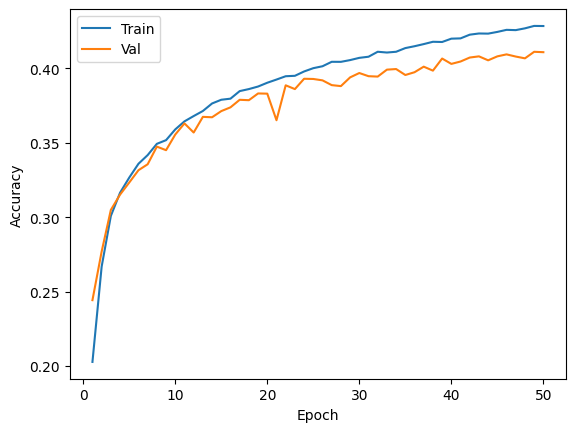

In [ ]:
PlotGraph(Epoch_List, TrainAcc_List, ValAcc_List)

In [ ]:
# # -------------------------------------------- CIFAR-100 Dataset -----------------------------------------------------------
# Option = 6
# Train_DataLoader, Val_DataLoader, Test_DataLoader = CreateDataLoaders(Option, 64)
# ModelName = "Model_AllConv_CIFAR100.pt"

# model = AllConv(100).to(device)
# loss_criteria = nn.CrossEntropyLoss()
# AdamOpt = torch.optim.Adam(model.parameters(), lr=0.0001)

# ValAccuracy = 0

# saved = False
# if saved == True:
#     saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)
# else:
#     model.train()
#     Train_Accuracy = 0

#     for e in range(EPOCHS):
#         Train_Accuracy = TrainModel(model, loss_criteria, AdamOpt, device, Train_DataLoader)
#         val_acc = EvaluateModel(model, Val_DataLoader, device)

#         print("EPOCH - ", e+1, ". Train Accuracy = ", Train_Accuracy.cpu().item(), ", Validation Accuracy = ", val_acc.cpu().item())
        
#         if val_acc.cpu().item() > ValAccuracy:
#             print("Model Re-Saved")
#             ValAccuracy = val_acc.cpu().item()
#             torch.save(model, ModelName)

#     saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)


# print()

# Train_Accuracy = EvaluateModel(saved_model, Train_DataLoader, device)
# print("Train Accuracy = ", Train_Accuracy.cpu().item())
# Test_Accuracy = EvaluateModel(saved_model, Test_DataLoader, device)
# print("Test Accuracy = ", Test_Accuracy.cpu().item())

# print("Generalization Gap = ", (Train_Accuracy.cpu().item() - Test_Accuracy.cpu().item()))

In [ ]:
# -------------------------------------------- CIFAR-100 Dataset -----------------------------------------------------------
Option = 6
Train_DataLoader, Val_DataLoader, Test_DataLoader = CreateDataLoaders(Option, 64)
ModelName = "Model_AllConv_CIFAR100.pt"

model = AllConv(100).to(device)
loss_criteria = nn.CrossEntropyLoss()
AdamOpt = torch.optim.Adam(model.parameters(), lr=0.0001)

ValAccuracy = 0
TrainAcc_List = []
ValAcc_List = []

saved = False
if saved == True:
    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)
else:
    model.train()
    Train_Accuracy = 0

    for e in range(EPOCHS):
        Train_Accuracy = TrainModel(model, loss_criteria, AdamOpt, device, Train_DataLoader)
        val_acc = EvaluateModel(model, Val_DataLoader, device)

        TrainAcc_List.append(Train_Accuracy.cpu().item())
        ValAcc_List.append(val_acc.cpu().item())

        print("EPOCH - ", e+1, ". Train Accuracy = ", Train_Accuracy.cpu().item(), ", Validation Accuracy = ", val_acc.cpu().item())
        
        if val_acc.cpu().item() > ValAccuracy:
            print("Model Re-Saved")
            ValAccuracy = val_acc.cpu().item()
            torch.save(model, ModelName)

    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)


print()

Train_Accuracy = EvaluateModel(saved_model, Train_DataLoader, device)
print("Train Accuracy = ", Train_Accuracy.cpu().item())
Test_Accuracy = EvaluateModel(saved_model, Test_DataLoader, device)
print("Test Accuracy = ", Test_Accuracy.cpu().item())

print("Generalization Gap = ", (Train_Accuracy.cpu().item() - Test_Accuracy.cpu().item()))

100%|██████████| 169001437/169001437 [00:04<00:00, 34935671.06it/s]


Extracting ./cifar-100-python.tar.gz to ./
Files already downloaded and verified


100%|██████████| 118/118 [00:01<00:00, 92.65it/s]


EPOCH -  1 . Train Accuracy =  0.02338823489844799 , Validation Accuracy =  0.04786666855216026
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.38it/s]


EPOCH -  2 . Train Accuracy =  0.05637647211551666 , Validation Accuracy =  0.06293333321809769
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.29it/s]


EPOCH -  3 . Train Accuracy =  0.07190588116645813 , Validation Accuracy =  0.06960000097751617
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 95.00it/s]


EPOCH -  4 . Train Accuracy =  0.08042352646589279 , Validation Accuracy =  0.07826666533946991
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 80.53it/s]


EPOCH -  5 . Train Accuracy =  0.08985882252454758 , Validation Accuracy =  0.08533333241939545
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 80.78it/s]


EPOCH -  6 . Train Accuracy =  0.09595294296741486 , Validation Accuracy =  0.09426666796207428
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.62it/s]


EPOCH -  7 . Train Accuracy =  0.10247059166431427 , Validation Accuracy =  0.09746666997671127
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.46it/s]


EPOCH -  8 . Train Accuracy =  0.10602352768182755 , Validation Accuracy =  0.09933333098888397
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.76it/s]


EPOCH -  9 . Train Accuracy =  0.11110588163137436 , Validation Accuracy =  0.10733333230018616
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.99it/s]


EPOCH -  10 . Train Accuracy =  0.11197647452354431 , Validation Accuracy =  0.10920000076293945
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 67.76it/s]


EPOCH -  11 . Train Accuracy =  0.11830588430166245 , Validation Accuracy =  0.10626666992902756


100%|██████████| 118/118 [00:01<00:00, 94.65it/s]


EPOCH -  12 . Train Accuracy =  0.12040000408887863 , Validation Accuracy =  0.11240000277757645
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.81it/s]


EPOCH -  13 . Train Accuracy =  0.12369412183761597 , Validation Accuracy =  0.1128000020980835
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.77it/s]


EPOCH -  14 . Train Accuracy =  0.12425882369279861 , Validation Accuracy =  0.11479999870061874
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.43it/s]


EPOCH -  15 . Train Accuracy =  0.12884706258773804 , Validation Accuracy =  0.11959999799728394
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 86.04it/s]


EPOCH -  16 . Train Accuracy =  0.12945882976055145 , Validation Accuracy =  0.11693333834409714


100%|██████████| 118/118 [00:01<00:00, 64.94it/s]


EPOCH -  17 . Train Accuracy =  0.1330353021621704 , Validation Accuracy =  0.11906667053699493


100%|██████████| 118/118 [00:01<00:00, 92.77it/s]


EPOCH -  18 . Train Accuracy =  0.13458824157714844 , Validation Accuracy =  0.12533333897590637
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.24it/s]


EPOCH -  19 . Train Accuracy =  0.13760000467300415 , Validation Accuracy =  0.12293333560228348


100%|██████████| 118/118 [00:01<00:00, 91.04it/s]


EPOCH -  20 . Train Accuracy =  0.13788235187530518 , Validation Accuracy =  0.12786667048931122
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.55it/s]


EPOCH -  21 . Train Accuracy =  0.14004705846309662 , Validation Accuracy =  0.12573333084583282


100%|██████████| 118/118 [00:01<00:00, 78.03it/s]


EPOCH -  22 . Train Accuracy =  0.1437647044658661 , Validation Accuracy =  0.12960000336170197
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 84.77it/s]


EPOCH -  23 . Train Accuracy =  0.14541175961494446 , Validation Accuracy =  0.13026666641235352
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 90.04it/s]


EPOCH -  24 . Train Accuracy =  0.14715294539928436 , Validation Accuracy =  0.13359999656677246
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.69it/s]


EPOCH -  25 . Train Accuracy =  0.14938823878765106 , Validation Accuracy =  0.13520000874996185
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.09it/s]


EPOCH -  26 . Train Accuracy =  0.151411771774292 , Validation Accuracy =  0.13493333756923676


100%|██████████| 118/118 [00:01<00:00, 90.05it/s]


EPOCH -  27 . Train Accuracy =  0.15484705567359924 , Validation Accuracy =  0.1361333280801773
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 64.96it/s]


EPOCH -  28 . Train Accuracy =  0.15390588343143463 , Validation Accuracy =  0.13973332941532135
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.24it/s]


EPOCH -  29 . Train Accuracy =  0.15689411759376526 , Validation Accuracy =  0.13840000331401825


100%|██████████| 118/118 [00:01<00:00, 91.21it/s]


EPOCH -  30 . Train Accuracy =  0.15877647697925568 , Validation Accuracy =  0.1398666650056839
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.16it/s]


EPOCH -  31 . Train Accuracy =  0.16011764109134674 , Validation Accuracy =  0.1425333321094513
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.69it/s]


EPOCH -  32 . Train Accuracy =  0.16164706647396088 , Validation Accuracy =  0.1441333293914795
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 87.38it/s]


EPOCH -  33 . Train Accuracy =  0.163223534822464 , Validation Accuracy =  0.1459999978542328
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 70.87it/s]


EPOCH -  34 . Train Accuracy =  0.16390588879585266 , Validation Accuracy =  0.14426666498184204


100%|██████████| 118/118 [00:01<00:00, 94.83it/s]


EPOCH -  35 . Train Accuracy =  0.16694118082523346 , Validation Accuracy =  0.14506666362285614


100%|██████████| 118/118 [00:01<00:00, 89.19it/s]


EPOCH -  36 . Train Accuracy =  0.16785882413387299 , Validation Accuracy =  0.14666666090488434
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.39it/s]


EPOCH -  37 . Train Accuracy =  0.16748236119747162 , Validation Accuracy =  0.14840000867843628
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.48it/s]


EPOCH -  38 . Train Accuracy =  0.16995294392108917 , Validation Accuracy =  0.147599995136261


100%|██████████| 118/118 [00:01<00:00, 79.83it/s]


EPOCH -  39 . Train Accuracy =  0.17098823189735413 , Validation Accuracy =  0.15186667442321777
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 80.10it/s]


EPOCH -  40 . Train Accuracy =  0.17127059400081635 , Validation Accuracy =  0.15186667442321777


100%|██████████| 118/118 [00:01<00:00, 93.54it/s]


EPOCH -  41 . Train Accuracy =  0.17463529109954834 , Validation Accuracy =  0.14813333749771118


100%|██████████| 118/118 [00:01<00:00, 91.30it/s]


EPOCH -  42 . Train Accuracy =  0.1748470664024353 , Validation Accuracy =  0.15013334155082703


100%|██████████| 118/118 [00:01<00:00, 93.07it/s]


EPOCH -  43 . Train Accuracy =  0.1759529411792755 , Validation Accuracy =  0.15426667034626007
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.55it/s]


EPOCH -  44 . Train Accuracy =  0.17687058448791504 , Validation Accuracy =  0.15559999644756317
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 64.05it/s]


EPOCH -  45 . Train Accuracy =  0.17783530056476593 , Validation Accuracy =  0.15266667306423187


100%|██████████| 118/118 [00:01<00:00, 92.39it/s]


EPOCH -  46 . Train Accuracy =  0.17971764504909515 , Validation Accuracy =  0.15533334016799927


100%|██████████| 118/118 [00:01<00:00, 93.00it/s]


EPOCH -  47 . Train Accuracy =  0.18039999902248383 , Validation Accuracy =  0.15720000863075256
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.97it/s]


EPOCH -  48 . Train Accuracy =  0.1820470541715622 , Validation Accuracy =  0.15613333880901337


100%|██████████| 118/118 [00:01<00:00, 92.67it/s]


EPOCH -  49 . Train Accuracy =  0.18371765315532684 , Validation Accuracy =  0.15533334016799927


100%|██████████| 118/118 [00:01<00:00, 94.10it/s]


EPOCH -  50 . Train Accuracy =  0.1834588199853897 , Validation Accuracy =  0.15826666355133057
Model Re-Saved



100%|██████████| 665/665 [00:07<00:00, 92.65it/s]


Train Accuracy =  0.18576470017433167


100%|██████████| 157/157 [00:01<00:00, 85.24it/s]

Test Accuracy =  0.15519998967647552
Generalization Gap =  0.03056471049785614


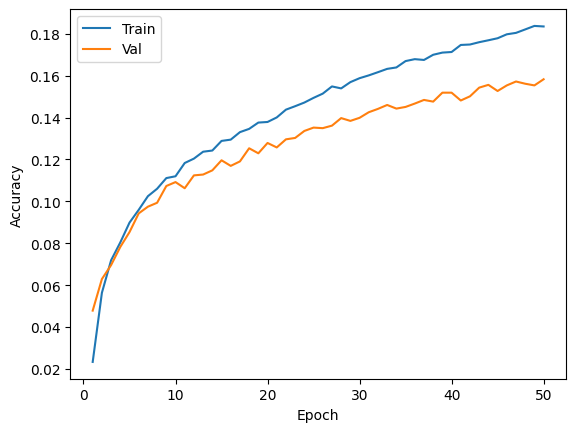

In [ ]:
PlotGraph(Epoch_List, TrainAcc_List, ValAcc_List)

In [ ]:
# # transform2 = transforms.Compose([
# #                     transforms.ToList(), 
# #                     # transforms.Normalize((0.5,), (0.5,)),
# #             ])

# def GetRandomizedCIFAR(p_NoisePercentage, p_BatchSize):
#     X_Train = []
#     Y_Train = []

#     train_dataset = datasets.CIFAR10("./", train=True, transform = transform, download=True)
#     train_subset, val_subset = torch.utils.data.random_split(train_dataset, [int(len(train_dataset) * 0.85), int(len(train_dataset) * 0.15)], generator=torch.Generator().manual_seed(1))
#     test_dataset = datasets.CIFAR10("./", train=False, transform = transform,  download=True)



#     print(train_dataset[0][0].shape)
#     print(train_dataset[0][0].tolist())
#     print(len(train_dataset[0][0].tolist()))
#     print(len(train_subset))
    
#     cnt = 0
#     for i in range (len(train_subset)):
#         X_Train.append(train_subset[i][0].tolist())
#         if cnt < p_NoisePercentage * len(train_subset):
#             Y_Train.append(random.randint(0, 9))
#             cnt += 1
        
#         else:
#             Y_Train.append(train_subset[i][0].tolist())

#     Val_DataLoader = torch.utils.data.DataLoader(val_subset, batch_size = p_BatchSize, shuffle = True)
#     Test_DataLoader = torch.utils.data.DataLoader(test_dataset, batch_size = p_BatchSize, shuffle = True)

#     return X_Train, Y_Train, Val_DataLoader, Test_DataLoader


In [ ]:
# X_Train, Y_Train, Val_DataLoader, Test_DataLoader = GetRandomizedCIFAR(0.25, 64)



In [ ]:
# X_Batch, Y_Batch = GetBatchData(X_Train, Y_Train, 2, 64)
# # print(Y_Train[:10])
# print(X_Batch.shape)
# print(Y_Batch.shape)
# print(Y_Batch)

In [ ]:
# X_Train, Y_Train, Val_DataLoader, Test_DataLoader = GetRandomizedCIFAR(0.20, 64)

In [ ]:
# -------------------------------------------- CIFAR-10 Dataset with 20% Randomness -----------------------------------------------------------
Option = 7
Train_DataLoader, Val_DataLoader, Test_DataLoader = CreateDataLoaders(Option, 64, RandomNoisePerc=0.2)
ModelName = "Model_AllConv_CIFAR10_R20.pt"

model = AllConv(10).to(device)
loss_criteria = nn.CrossEntropyLoss()
AdamOpt = torch.optim.Adam(model.parameters(), lr=0.0001)

ValAccuracy = 0
TrainAcc_List = []
ValAcc_List = []

saved = False
if saved == True:
    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)
else:
    model.train()
    Train_Accuracy = 0

    for e in range(EPOCHS):
        Train_Accuracy = TrainModel(model, loss_criteria, AdamOpt, device, Train_DataLoader)
        val_acc = EvaluateModel(model, Val_DataLoader, device)

        TrainAcc_List.append(Train_Accuracy.cpu().item())
        ValAcc_List.append(val_acc.cpu().item())

        print("EPOCH - ", e+1, ". Train Accuracy = ", Train_Accuracy.cpu().item(), ", Validation Accuracy = ", val_acc.cpu().item())
        
        if val_acc.cpu().item() > ValAccuracy:
            print("Model Re-Saved")
            ValAccuracy = val_acc.cpu().item()
            torch.save(model, ModelName)

    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)


print()

Train_Accuracy = EvaluateModel(saved_model, Train_DataLoader, device)
print("Train Accuracy = ", Train_Accuracy.cpu().item())
Test_Accuracy = EvaluateModel(saved_model, Test_DataLoader, device)
print("Test Accuracy = ", Test_Accuracy.cpu().item())

print("Generalization Gap = ", (Train_Accuracy.cpu().item() - Test_Accuracy.cpu().item()))

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 118/118 [00:01<00:00, 91.39it/s]


EPOCH -  1 . Train Accuracy =  0.1967294067144394 , Validation Accuracy =  0.25866666436195374
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 66.17it/s]


EPOCH -  2 . Train Accuracy =  0.27115294337272644 , Validation Accuracy =  0.28306666016578674
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.81it/s]


EPOCH -  3 . Train Accuracy =  0.29924705624580383 , Validation Accuracy =  0.31093335151672363
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.15it/s]


EPOCH -  4 . Train Accuracy =  0.32296469807624817 , Validation Accuracy =  0.32066667079925537
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.39it/s]


EPOCH -  5 . Train Accuracy =  0.33896470069885254 , Validation Accuracy =  0.3441333472728729
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.51it/s]


EPOCH -  6 . Train Accuracy =  0.34978824853897095 , Validation Accuracy =  0.3529333472251892
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 84.58it/s]


EPOCH -  7 . Train Accuracy =  0.3586353063583374 , Validation Accuracy =  0.35546666383743286
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 62.89it/s]


EPOCH -  8 . Train Accuracy =  0.36651766300201416 , Validation Accuracy =  0.35866665840148926
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.49it/s]


EPOCH -  9 . Train Accuracy =  0.36922353506088257 , Validation Accuracy =  0.36399999260902405
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.28it/s]


EPOCH -  10 . Train Accuracy =  0.37545883655548096 , Validation Accuracy =  0.3713333308696747
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.07it/s]


EPOCH -  11 . Train Accuracy =  0.38058823347091675 , Validation Accuracy =  0.38040000200271606
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.54it/s]


EPOCH -  12 . Train Accuracy =  0.384517639875412 , Validation Accuracy =  0.3776000142097473


100%|██████████| 118/118 [00:01<00:00, 92.51it/s]


EPOCH -  13 . Train Accuracy =  0.38790589570999146 , Validation Accuracy =  0.3770666718482971


100%|██████████| 118/118 [00:01<00:00, 67.21it/s]


EPOCH -  14 . Train Accuracy =  0.3918117582798004 , Validation Accuracy =  0.3869333267211914
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.80it/s]


EPOCH -  15 . Train Accuracy =  0.3937176465988159 , Validation Accuracy =  0.3858666718006134


100%|██████████| 118/118 [00:01<00:00, 92.98it/s]


EPOCH -  16 . Train Accuracy =  0.39889413118362427 , Validation Accuracy =  0.390666663646698
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.99it/s]


EPOCH -  17 . Train Accuracy =  0.40007057785987854 , Validation Accuracy =  0.3869333267211914


100%|██████████| 118/118 [00:01<00:00, 91.33it/s]


EPOCH -  18 . Train Accuracy =  0.40228235721588135 , Validation Accuracy =  0.39800000190734863
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 80.49it/s]


EPOCH -  19 . Train Accuracy =  0.404729425907135 , Validation Accuracy =  0.3903999924659729


100%|██████████| 118/118 [00:01<00:00, 78.88it/s]


EPOCH -  20 . Train Accuracy =  0.4081176519393921 , Validation Accuracy =  0.3994666635990143
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.38it/s]


EPOCH -  21 . Train Accuracy =  0.40943530201911926 , Validation Accuracy =  0.3988000154495239


100%|██████████| 118/118 [00:01<00:00, 93.23it/s]


EPOCH -  22 . Train Accuracy =  0.41155293583869934 , Validation Accuracy =  0.3912000060081482


100%|██████████| 118/118 [00:01<00:00, 89.61it/s]


EPOCH -  23 . Train Accuracy =  0.4125646948814392 , Validation Accuracy =  0.4013333320617676
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.90it/s]


EPOCH -  24 . Train Accuracy =  0.41552940011024475 , Validation Accuracy =  0.4000000059604645


100%|██████████| 118/118 [00:01<00:00, 69.30it/s]


EPOCH -  25 . Train Accuracy =  0.41665881872177124 , Validation Accuracy =  0.4005333483219147


100%|██████████| 118/118 [00:01<00:00, 93.51it/s]


EPOCH -  26 . Train Accuracy =  0.4194588363170624 , Validation Accuracy =  0.4054666757583618
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.17it/s]


EPOCH -  27 . Train Accuracy =  0.4224470555782318 , Validation Accuracy =  0.4017333388328552


100%|██████████| 118/118 [00:01<00:00, 93.16it/s]


EPOCH -  28 . Train Accuracy =  0.42315295338630676 , Validation Accuracy =  0.40906667709350586
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.06it/s]


EPOCH -  29 . Train Accuracy =  0.42555293440818787 , Validation Accuracy =  0.40773335099220276


100%|██████████| 118/118 [00:01<00:00, 90.64it/s]


EPOCH -  30 . Train Accuracy =  0.428352952003479 , Validation Accuracy =  0.4068000018596649


100%|██████████| 118/118 [00:01<00:00, 65.62it/s]


EPOCH -  31 . Train Accuracy =  0.42910587787628174 , Validation Accuracy =  0.412933349609375
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.15it/s]


EPOCH -  32 . Train Accuracy =  0.4305647015571594 , Validation Accuracy =  0.4134666621685028
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.71it/s]


EPOCH -  33 . Train Accuracy =  0.43150588870048523 , Validation Accuracy =  0.41359999775886536
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.06it/s]


EPOCH -  34 . Train Accuracy =  0.43355295062065125 , Validation Accuracy =  0.41466668248176575
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.59it/s]


EPOCH -  35 . Train Accuracy =  0.43578824400901794 , Validation Accuracy =  0.4180000126361847
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.91it/s]


EPOCH -  36 . Train Accuracy =  0.4361411929130554 , Validation Accuracy =  0.41626667976379395


100%|██████████| 118/118 [00:01<00:00, 68.92it/s]


EPOCH -  37 . Train Accuracy =  0.43736469745635986 , Validation Accuracy =  0.41786667704582214


100%|██████████| 118/118 [00:01<00:00, 91.66it/s]


EPOCH -  38 . Train Accuracy =  0.44009411334991455 , Validation Accuracy =  0.41546666622161865


100%|██████████| 118/118 [00:01<00:00, 91.89it/s]


EPOCH -  39 . Train Accuracy =  0.44249412417411804 , Validation Accuracy =  0.41840001940727234
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.28it/s]


EPOCH -  40 . Train Accuracy =  0.4416470527648926 , Validation Accuracy =  0.41733333468437195


100%|██████████| 118/118 [00:01<00:00, 89.55it/s]


EPOCH -  41 . Train Accuracy =  0.4462588131427765 , Validation Accuracy =  0.4236000180244446
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 80.11it/s]


EPOCH -  42 . Train Accuracy =  0.44628235697746277 , Validation Accuracy =  0.4177333414554596


100%|██████████| 118/118 [00:01<00:00, 75.23it/s]


EPOCH -  43 . Train Accuracy =  0.4463764727115631 , Validation Accuracy =  0.42266666889190674


100%|██████████| 118/118 [00:01<00:00, 89.70it/s]


EPOCH -  44 . Train Accuracy =  0.44807058572769165 , Validation Accuracy =  0.4238666594028473
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.50it/s]


EPOCH -  45 . Train Accuracy =  0.4500235319137573 , Validation Accuracy =  0.42239999771118164


100%|██████████| 118/118 [00:01<00:00, 93.29it/s]


EPOCH -  46 . Train Accuracy =  0.45256471633911133 , Validation Accuracy =  0.42293334007263184


100%|██████████| 118/118 [00:01<00:00, 91.59it/s]


EPOCH -  47 . Train Accuracy =  0.4518117606639862 , Validation Accuracy =  0.4286666810512543
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 72.71it/s]


EPOCH -  48 . Train Accuracy =  0.45237648487091064 , Validation Accuracy =  0.4284000098705292


100%|██████████| 118/118 [00:01<00:00, 90.23it/s]


EPOCH -  49 . Train Accuracy =  0.453741192817688 , Validation Accuracy =  0.4311999976634979
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 90.33it/s]


EPOCH -  50 . Train Accuracy =  0.4569176435470581 , Validation Accuracy =  0.43053334951400757



100%|██████████| 665/665 [00:08<00:00, 81.88it/s]


Train Accuracy =  0.4570588171482086


100%|██████████| 157/157 [00:01<00:00, 93.10it/s]

Test Accuracy =  0.43639999628067017
Generalization Gap =  0.020658820867538452


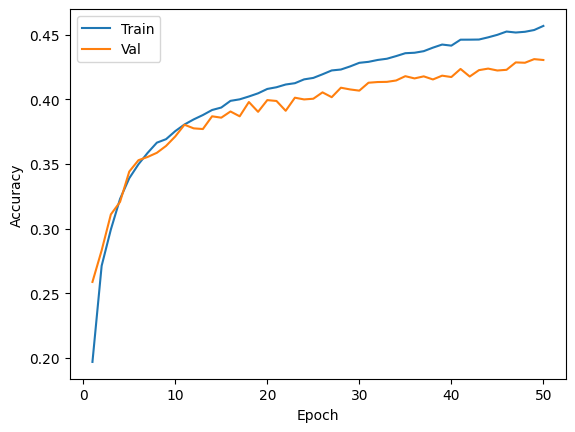

In [ ]:
PlotGraph(Epoch_List, TrainAcc_List, ValAcc_List)

In [ ]:
# -------------------------------------------- CIFAR-10 Dataset with 40% Randomness -----------------------------------------------------------
Option = 7
Train_DataLoader, Val_DataLoader, Test_DataLoader = CreateDataLoaders(Option, 64, RandomNoisePerc=0.4)
ModelName = "Model_AllConv_CIFAR10_R40.pt"

model = AllConv(10).to(device)
loss_criteria = nn.CrossEntropyLoss()
AdamOpt = torch.optim.Adam(model.parameters(), lr=0.0001)

ValAccuracy = 0
TrainAcc_List = []
ValAcc_List = []

saved = False
if saved == True:
    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)
else:
    model.train()
    Train_Accuracy = 0

    for e in range(EPOCHS):
        Train_Accuracy = TrainModel(model, loss_criteria, AdamOpt, device, Train_DataLoader)
        val_acc = EvaluateModel(model, Val_DataLoader, device)

        TrainAcc_List.append(Train_Accuracy.cpu().item())
        ValAcc_List.append(val_acc.cpu().item())

        print("EPOCH - ", e+1, ". Train Accuracy = ", Train_Accuracy.cpu().item(), ", Validation Accuracy = ", val_acc.cpu().item())
        
        if val_acc.cpu().item() > ValAccuracy:
            print("Model Re-Saved")
            ValAccuracy = val_acc.cpu().item()
            torch.save(model, ModelName)

    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)


print()

Train_Accuracy = EvaluateModel(saved_model, Train_DataLoader, device)
print("Train Accuracy = ", Train_Accuracy.cpu().item())
Test_Accuracy = EvaluateModel(saved_model, Test_DataLoader, device)
print("Test Accuracy = ", Test_Accuracy.cpu().item())

print("Generalization Gap = ", (Train_Accuracy.cpu().item() - Test_Accuracy.cpu().item()))

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 118/118 [00:01<00:00, 92.15it/s]


EPOCH -  1 . Train Accuracy =  0.19261176884174347 , Validation Accuracy =  0.23226666450500488
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 90.47it/s]


EPOCH -  2 . Train Accuracy =  0.2686823606491089 , Validation Accuracy =  0.26786667108535767
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.40it/s]


EPOCH -  3 . Train Accuracy =  0.2986353039741516 , Validation Accuracy =  0.2998666763305664
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 69.80it/s]


EPOCH -  4 . Train Accuracy =  0.31997647881507874 , Validation Accuracy =  0.3163999915122986
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.49it/s]


EPOCH -  5 . Train Accuracy =  0.335999995470047 , Validation Accuracy =  0.3346666693687439
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.51it/s]


EPOCH -  6 . Train Accuracy =  0.349576473236084 , Validation Accuracy =  0.3421333432197571
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.21it/s]


EPOCH -  7 . Train Accuracy =  0.35745882987976074 , Validation Accuracy =  0.3489333391189575
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.75it/s]


EPOCH -  8 . Train Accuracy =  0.36447060108184814 , Validation Accuracy =  0.3545333445072174
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 85.82it/s]


EPOCH -  9 . Train Accuracy =  0.36957648396492004 , Validation Accuracy =  0.35546666383743286
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 75.31it/s]


EPOCH -  10 . Train Accuracy =  0.3763294219970703 , Validation Accuracy =  0.35973334312438965
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.09it/s]


EPOCH -  11 . Train Accuracy =  0.38136470317840576 , Validation Accuracy =  0.36559998989105225
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.37it/s]


EPOCH -  12 . Train Accuracy =  0.3844941258430481 , Validation Accuracy =  0.367333322763443
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.10it/s]


EPOCH -  13 . Train Accuracy =  0.387835294008255 , Validation Accuracy =  0.3684000074863434
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.69it/s]


EPOCH -  14 . Train Accuracy =  0.38997647166252136 , Validation Accuracy =  0.37119999527931213
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 78.09it/s]


EPOCH -  15 . Train Accuracy =  0.3940705955028534 , Validation Accuracy =  0.3808000087738037
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 76.09it/s]


EPOCH -  16 . Train Accuracy =  0.3974117636680603 , Validation Accuracy =  0.37720000743865967


100%|██████████| 118/118 [00:01<00:00, 85.53it/s]


EPOCH -  17 . Train Accuracy =  0.3996706008911133 , Validation Accuracy =  0.3903999924659729
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 89.71it/s]


EPOCH -  18 . Train Accuracy =  0.40454116463661194 , Validation Accuracy =  0.38866665959358215


100%|██████████| 118/118 [00:01<00:00, 93.67it/s]


EPOCH -  19 . Train Accuracy =  0.40515294671058655 , Validation Accuracy =  0.38733333349227905


100%|██████████| 118/118 [00:01<00:00, 92.63it/s]


EPOCH -  20 . Train Accuracy =  0.4102117717266083 , Validation Accuracy =  0.38946667313575745


100%|██████████| 118/118 [00:01<00:00, 74.89it/s]


EPOCH -  21 . Train Accuracy =  0.41025882959365845 , Validation Accuracy =  0.3930666744709015
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 88.31it/s]


EPOCH -  22 . Train Accuracy =  0.412235289812088 , Validation Accuracy =  0.3952000141143799
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.67it/s]


EPOCH -  23 . Train Accuracy =  0.4146353006362915 , Validation Accuracy =  0.3925333321094513


100%|██████████| 118/118 [00:01<00:00, 91.20it/s]


EPOCH -  24 . Train Accuracy =  0.4164000153541565 , Validation Accuracy =  0.3938666582107544


100%|██████████| 118/118 [00:01<00:00, 91.63it/s]


EPOCH -  25 . Train Accuracy =  0.41837647557258606 , Validation Accuracy =  0.396533340215683
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 70.00it/s]


EPOCH -  26 . Train Accuracy =  0.438611775636673 , Validation Accuracy =  0.4474666714668274
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 77.69it/s]


EPOCH -  27 . Train Accuracy =  0.4560000002384186 , Validation Accuracy =  0.4458666741847992


100%|██████████| 118/118 [00:01<00:00, 81.67it/s]


EPOCH -  28 . Train Accuracy =  0.4578823447227478 , Validation Accuracy =  0.44733333587646484


100%|██████████| 118/118 [00:01<00:00, 93.31it/s]


EPOCH -  29 . Train Accuracy =  0.4610588252544403 , Validation Accuracy =  0.4501333236694336
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.04it/s]


EPOCH -  30 . Train Accuracy =  0.46675294637680054 , Validation Accuracy =  0.454800009727478
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.06it/s]


EPOCH -  31 . Train Accuracy =  0.467105895280838 , Validation Accuracy =  0.4562666714191437
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 90.51it/s]


EPOCH -  32 . Train Accuracy =  0.4704705774784088 , Validation Accuracy =  0.4538666605949402


100%|██████████| 118/118 [00:01<00:00, 70.38it/s]


EPOCH -  33 . Train Accuracy =  0.4712941348552704 , Validation Accuracy =  0.4501333236694336


100%|██████████| 118/118 [00:01<00:00, 91.92it/s]


EPOCH -  34 . Train Accuracy =  0.47647058963775635 , Validation Accuracy =  0.4607999920845032
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.11it/s]


EPOCH -  35 . Train Accuracy =  0.4762117564678192 , Validation Accuracy =  0.46346667408943176
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.87it/s]


EPOCH -  36 . Train Accuracy =  0.4792705774307251 , Validation Accuracy =  0.459199994802475


100%|██████████| 118/118 [00:01<00:00, 89.52it/s]


EPOCH -  37 . Train Accuracy =  0.4812941253185272 , Validation Accuracy =  0.46400001645088196
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 90.82it/s]


EPOCH -  38 . Train Accuracy =  0.48348236083984375 , Validation Accuracy =  0.46720001101493835
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 63.69it/s]


EPOCH -  39 . Train Accuracy =  0.4861176609992981 , Validation Accuracy =  0.4665333330631256


100%|██████████| 118/118 [00:01<00:00, 90.54it/s]


EPOCH -  40 . Train Accuracy =  0.48743531107902527 , Validation Accuracy =  0.47226667404174805
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.96it/s]


EPOCH -  41 . Train Accuracy =  0.4895058870315552 , Validation Accuracy =  0.4654666781425476


100%|██████████| 118/118 [00:01<00:00, 94.84it/s]


EPOCH -  42 . Train Accuracy =  0.491505891084671 , Validation Accuracy =  0.47333332896232605
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.65it/s]


EPOCH -  43 . Train Accuracy =  0.49209412932395935 , Validation Accuracy =  0.4772000014781952
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.67it/s]


EPOCH -  44 . Train Accuracy =  0.4936235249042511 , Validation Accuracy =  0.47573333978652954


100%|██████████| 118/118 [00:01<00:00, 63.21it/s]


EPOCH -  45 . Train Accuracy =  0.49654117226600647 , Validation Accuracy =  0.4758666753768921


100%|██████████| 118/118 [00:01<00:00, 92.45it/s]


EPOCH -  46 . Train Accuracy =  0.4972705841064453 , Validation Accuracy =  0.4747999906539917


100%|██████████| 118/118 [00:01<00:00, 91.20it/s]


EPOCH -  47 . Train Accuracy =  0.5000470876693726 , Validation Accuracy =  0.4750666618347168


100%|██████████| 118/118 [00:01<00:00, 92.40it/s]


EPOCH -  48 . Train Accuracy =  0.5019999742507935 , Validation Accuracy =  0.4838666617870331
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.32it/s]


EPOCH -  49 . Train Accuracy =  0.5040470361709595 , Validation Accuracy =  0.48266667127609253


100%|██████████| 118/118 [00:01<00:00, 92.13it/s]


EPOCH -  50 . Train Accuracy =  0.503811776638031 , Validation Accuracy =  0.4819999933242798



100%|██████████| 665/665 [00:07<00:00, 89.73it/s]


Train Accuracy =  0.5065411925315857


100%|██████████| 157/157 [00:02<00:00, 78.02it/s]

Test Accuracy =  0.48399999737739563
Generalization Gap =  0.022541195154190063


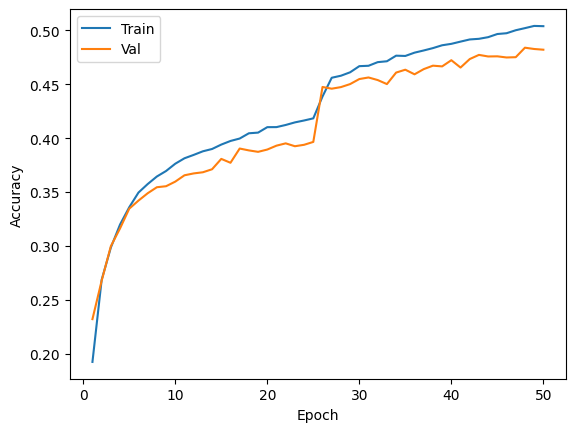

In [ ]:
PlotGraph(Epoch_List, TrainAcc_List, ValAcc_List)

In [ ]:
# -------------------------------------------- CIFAR-10 Dataset with 60% Randomness -----------------------------------------------------------
Option = 7
Train_DataLoader, Val_DataLoader, Test_DataLoader = CreateDataLoaders(Option, 64, RandomNoisePerc=0.6)
ModelName = "Model_AllConv_CIFAR10_R60.pt"

model = AllConv(10).to(device)
loss_criteria = nn.CrossEntropyLoss()
AdamOpt = torch.optim.Adam(model.parameters(), lr=0.0001)

ValAccuracy = 0
TrainAcc_List = []
ValAcc_List = []

saved = False
if saved == True:
    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)
else:
    model.train()
    Train_Accuracy = 0

    for e in range(EPOCHS):
        Train_Accuracy = TrainModel(model, loss_criteria, AdamOpt, device, Train_DataLoader)
        val_acc = EvaluateModel(model, Val_DataLoader, device)

        TrainAcc_List.append(Train_Accuracy.cpu().item())
        ValAcc_List.append(val_acc.cpu().item())

        print("EPOCH - ", e+1, ". Train Accuracy = ", Train_Accuracy.cpu().item(), ", Validation Accuracy = ", val_acc.cpu().item())
        
        if val_acc.cpu().item() > ValAccuracy:
            print("Model Re-Saved")
            ValAccuracy = val_acc.cpu().item()
            torch.save(model, ModelName)

    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)


print()

Train_Accuracy = EvaluateModel(saved_model, Train_DataLoader, device)
print("Train Accuracy = ", Train_Accuracy.cpu().item())
Test_Accuracy = EvaluateModel(saved_model, Test_DataLoader, device)
print("Test Accuracy = ", Test_Accuracy.cpu().item())

print("Generalization Gap = ", (Train_Accuracy.cpu().item() - Test_Accuracy.cpu().item()))

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 118/118 [00:01<00:00, 93.64it/s]


EPOCH -  1 . Train Accuracy =  0.17800000309944153 , Validation Accuracy =  0.22253333032131195
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.21it/s]


EPOCH -  2 . Train Accuracy =  0.2337176501750946 , Validation Accuracy =  0.23413333296775818
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.96it/s]


EPOCH -  3 . Train Accuracy =  0.2469882369041443 , Validation Accuracy =  0.2457333356142044
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 68.53it/s]


EPOCH -  4 . Train Accuracy =  0.2572000026702881 , Validation Accuracy =  0.25386667251586914
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.29it/s]


EPOCH -  5 . Train Accuracy =  0.26555293798446655 , Validation Accuracy =  0.2704000174999237
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.79it/s]


EPOCH -  6 . Train Accuracy =  0.27545881271362305 , Validation Accuracy =  0.27533334493637085
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.90it/s]


EPOCH -  7 . Train Accuracy =  0.28103530406951904 , Validation Accuracy =  0.27720001339912415
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.87it/s]


EPOCH -  8 . Train Accuracy =  0.28611764311790466 , Validation Accuracy =  0.28546667098999023
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 87.96it/s]


EPOCH -  9 . Train Accuracy =  0.29216471314430237 , Validation Accuracy =  0.2810666561126709


100%|██████████| 118/118 [00:01<00:00, 63.63it/s]


EPOCH -  10 . Train Accuracy =  0.2965646982192993 , Validation Accuracy =  0.29786667227745056
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.45it/s]


EPOCH -  11 . Train Accuracy =  0.30112940073013306 , Validation Accuracy =  0.30213335156440735
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.76it/s]


EPOCH -  12 . Train Accuracy =  0.3048705756664276 , Validation Accuracy =  0.29919999837875366


100%|██████████| 118/118 [00:01<00:00, 92.71it/s]


EPOCH -  13 . Train Accuracy =  0.3074588179588318 , Validation Accuracy =  0.3030666708946228
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.30it/s]


EPOCH -  14 . Train Accuracy =  0.3119058907032013 , Validation Accuracy =  0.3086666762828827
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.63it/s]


EPOCH -  15 . Train Accuracy =  0.31357645988464355 , Validation Accuracy =  0.30933332443237305
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 69.64it/s]


EPOCH -  16 . Train Accuracy =  0.3151293992996216 , Validation Accuracy =  0.3113333284854889
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.67it/s]


EPOCH -  17 . Train Accuracy =  0.3179529309272766 , Validation Accuracy =  0.3131999969482422
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.90it/s]


EPOCH -  18 . Train Accuracy =  0.3181176483631134 , Validation Accuracy =  0.31386667490005493
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.59it/s]


EPOCH -  19 . Train Accuracy =  0.3208470642566681 , Validation Accuracy =  0.3157333433628082
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.85it/s]


EPOCH -  20 . Train Accuracy =  0.3233411908149719 , Validation Accuracy =  0.31386667490005493


100%|██████████| 118/118 [00:01<00:00, 75.93it/s]


EPOCH -  21 . Train Accuracy =  0.32312941551208496 , Validation Accuracy =  0.3224000036716461
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 85.38it/s]


EPOCH -  22 . Train Accuracy =  0.3248235285282135 , Validation Accuracy =  0.3194666802883148


100%|██████████| 118/118 [00:01<00:00, 93.43it/s]


EPOCH -  23 . Train Accuracy =  0.32630589604377747 , Validation Accuracy =  0.32253333926200867
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.40it/s]


EPOCH -  24 . Train Accuracy =  0.32985883951187134 , Validation Accuracy =  0.3217333257198334


100%|██████████| 118/118 [00:01<00:00, 92.47it/s]


EPOCH -  25 . Train Accuracy =  0.32969412207603455 , Validation Accuracy =  0.3218666613101959


100%|██████████| 118/118 [00:01<00:00, 67.61it/s]


EPOCH -  26 . Train Accuracy =  0.3324705958366394 , Validation Accuracy =  0.3277333378791809
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.38it/s]


EPOCH -  27 . Train Accuracy =  0.33209413290023804 , Validation Accuracy =  0.32626667618751526


100%|██████████| 118/118 [00:01<00:00, 92.75it/s]


EPOCH -  28 . Train Accuracy =  0.33435294032096863 , Validation Accuracy =  0.3271999955177307


100%|██████████| 118/118 [00:01<00:00, 79.44it/s]


EPOCH -  29 . Train Accuracy =  0.3356705904006958 , Validation Accuracy =  0.32919999957084656
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 78.29it/s]


EPOCH -  30 . Train Accuracy =  0.33668234944343567 , Validation Accuracy =  0.32973334193229675
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.09it/s]


EPOCH -  31 . Train Accuracy =  0.33828234672546387 , Validation Accuracy =  0.3317333459854126
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.28it/s]


EPOCH -  32 . Train Accuracy =  0.33828234672546387 , Validation Accuracy =  0.3298666775226593


100%|██████████| 118/118 [00:01<00:00, 93.41it/s]


EPOCH -  33 . Train Accuracy =  0.3391999900341034 , Validation Accuracy =  0.32626667618751526


100%|██████████| 118/118 [00:01<00:00, 93.78it/s]


EPOCH -  34 . Train Accuracy =  0.34119999408721924 , Validation Accuracy =  0.3330666720867157
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.50it/s]


EPOCH -  35 . Train Accuracy =  0.3424000144004822 , Validation Accuracy =  0.33160001039505005


100%|██████████| 118/118 [00:01<00:00, 69.22it/s]


EPOCH -  36 . Train Accuracy =  0.3444235324859619 , Validation Accuracy =  0.33186668157577515


100%|██████████| 118/118 [00:01<00:00, 93.37it/s]


EPOCH -  37 . Train Accuracy =  0.34548234939575195 , Validation Accuracy =  0.32653334736824036


100%|██████████| 118/118 [00:01<00:00, 91.81it/s]


EPOCH -  38 . Train Accuracy =  0.34583529829978943 , Validation Accuracy =  0.33079999685287476


100%|██████████| 118/118 [00:01<00:00, 89.07it/s]


EPOCH -  39 . Train Accuracy =  0.3462117612361908 , Validation Accuracy =  0.3365333378314972
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.36it/s]


EPOCH -  40 . Train Accuracy =  0.3475058972835541 , Validation Accuracy =  0.33373335003852844


100%|██████████| 118/118 [00:01<00:00, 86.03it/s]


EPOCH -  41 . Train Accuracy =  0.34804704785346985 , Validation Accuracy =  0.33906668424606323
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 75.45it/s]


EPOCH -  42 . Train Accuracy =  0.3505176603794098 , Validation Accuracy =  0.33880001306533813


100%|██████████| 118/118 [00:01<00:00, 92.91it/s]


EPOCH -  43 . Train Accuracy =  0.350352942943573 , Validation Accuracy =  0.3400000035762787
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 88.27it/s]


EPOCH -  44 . Train Accuracy =  0.35136470198631287 , Validation Accuracy =  0.3389333486557007


100%|██████████| 118/118 [00:01<00:00, 92.77it/s]


EPOCH -  45 . Train Accuracy =  0.3537176549434662 , Validation Accuracy =  0.3400000035762787


100%|██████████| 118/118 [00:01<00:00, 86.55it/s]


EPOCH -  46 . Train Accuracy =  0.3543529510498047 , Validation Accuracy =  0.3368000090122223


100%|██████████| 118/118 [00:01<00:00, 71.35it/s]


EPOCH -  47 . Train Accuracy =  0.3542117774486542 , Validation Accuracy =  0.344400018453598
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 87.34it/s]


EPOCH -  48 . Train Accuracy =  0.3543529510498047 , Validation Accuracy =  0.3476000130176544
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.69it/s]


EPOCH -  49 . Train Accuracy =  0.3560470640659332 , Validation Accuracy =  0.3397333323955536


100%|██████████| 118/118 [00:01<00:00, 89.64it/s]


EPOCH -  50 . Train Accuracy =  0.35665881633758545 , Validation Accuracy =  0.3431999981403351



100%|██████████| 665/665 [00:08<00:00, 82.86it/s]


Train Accuracy =  0.36016470193862915


100%|██████████| 157/157 [00:01<00:00, 94.82it/s]

Test Accuracy =  0.3490999937057495
Generalization Gap =  0.011064708232879639


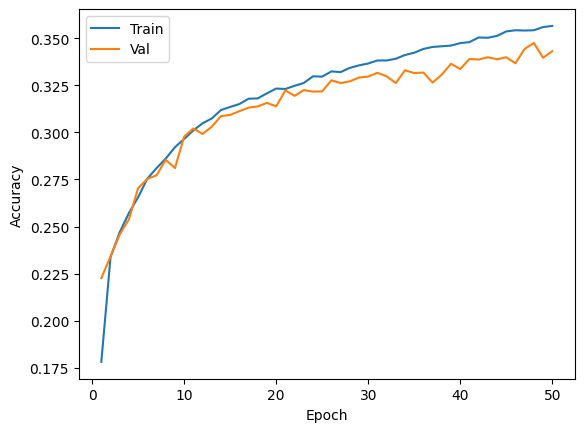

In [ ]:
PlotGraph(Epoch_List, TrainAcc_List, ValAcc_List)

In [ ]:
# -------------------------------------------- CIFAR-10 Dataset with 80% Randomness -----------------------------------------------------------
Option = 7
Train_DataLoader, Val_DataLoader, Test_DataLoader = CreateDataLoaders(Option, 64, RandomNoisePerc=0.8)
ModelName = "Model_AllConv_CIFAR10_R80.pt"

model = AllConv(10).to(device)
loss_criteria = nn.CrossEntropyLoss()
AdamOpt = torch.optim.Adam(model.parameters(), lr=0.0001)

ValAccuracy = 0
TrainAcc_List = []
ValAcc_List = []

saved = False
if saved == True:
    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)
else:
    model.train()
    Train_Accuracy = 0

    for e in range(EPOCHS):
        Train_Accuracy = TrainModel(model, loss_criteria, AdamOpt, device, Train_DataLoader)
        val_acc = EvaluateModel(model, Val_DataLoader, device)

        TrainAcc_List.append(Train_Accuracy.cpu().item())
        ValAcc_List.append(val_acc.cpu().item())

        print("EPOCH - ", e+1, ". Train Accuracy = ", Train_Accuracy.cpu().item(), ", Validation Accuracy = ", val_acc.cpu().item())
        
        if val_acc.cpu().item() > ValAccuracy:
            print("Model Re-Saved")
            ValAccuracy = val_acc.cpu().item()
            torch.save(model, ModelName)

    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)


print()

Train_Accuracy = EvaluateModel(saved_model, Train_DataLoader, device)
print("Train Accuracy = ", Train_Accuracy.cpu().item())
Test_Accuracy = EvaluateModel(saved_model, Test_DataLoader, device)
print("Test Accuracy = ", Test_Accuracy.cpu().item())

print("Generalization Gap = ", (Train_Accuracy.cpu().item() - Test_Accuracy.cpu().item()))

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 118/118 [00:01<00:00, 86.27it/s]


EPOCH -  1 . Train Accuracy =  0.16475294530391693 , Validation Accuracy =  0.20546667277812958
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.35it/s]


EPOCH -  2 . Train Accuracy =  0.21687059104442596 , Validation Accuracy =  0.2266666740179062
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 65.03it/s]


EPOCH -  3 . Train Accuracy =  0.23623529076576233 , Validation Accuracy =  0.2446666657924652
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.98it/s]


EPOCH -  4 . Train Accuracy =  0.2512470483779907 , Validation Accuracy =  0.24986666440963745
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.66it/s]


EPOCH -  5 . Train Accuracy =  0.26364704966545105 , Validation Accuracy =  0.2626666724681854
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.14it/s]


EPOCH -  6 . Train Accuracy =  0.27609410881996155 , Validation Accuracy =  0.27106666564941406
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.13it/s]


EPOCH -  7 . Train Accuracy =  0.28341177105903625 , Validation Accuracy =  0.2800000011920929
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.26it/s]


EPOCH -  8 . Train Accuracy =  0.29044705629348755 , Validation Accuracy =  0.28600001335144043
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 67.01it/s]


EPOCH -  9 . Train Accuracy =  0.2951764762401581 , Validation Accuracy =  0.2932000160217285
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.89it/s]


EPOCH -  10 . Train Accuracy =  0.2988470494747162 , Validation Accuracy =  0.29253333806991577


100%|██████████| 118/118 [00:01<00:00, 92.07it/s]


EPOCH -  11 . Train Accuracy =  0.30369412899017334 , Validation Accuracy =  0.29840001463890076
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.74it/s]


EPOCH -  12 . Train Accuracy =  0.30752941966056824 , Validation Accuracy =  0.30186668038368225
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.75it/s]


EPOCH -  13 . Train Accuracy =  0.3114588260650635 , Validation Accuracy =  0.30399999022483826
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.18it/s]


EPOCH -  14 . Train Accuracy =  0.31616470217704773 , Validation Accuracy =  0.30826666951179504
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 68.50it/s]


EPOCH -  15 . Train Accuracy =  0.3197176456451416 , Validation Accuracy =  0.3160000145435333
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.62it/s]


EPOCH -  16 . Train Accuracy =  0.3223058879375458 , Validation Accuracy =  0.317466676235199
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.14it/s]


EPOCH -  17 . Train Accuracy =  0.32519999146461487 , Validation Accuracy =  0.31933334469795227
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.80it/s]


EPOCH -  18 . Train Accuracy =  0.3262588381767273 , Validation Accuracy =  0.3218666613101959
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.44it/s]


EPOCH -  19 . Train Accuracy =  0.32858824729919434 , Validation Accuracy =  0.32386666536331177
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 89.99it/s]


EPOCH -  20 . Train Accuracy =  0.33112940192222595 , Validation Accuracy =  0.32386666536331177


100%|██████████| 118/118 [00:01<00:00, 71.62it/s]


EPOCH -  21 . Train Accuracy =  0.3345176577568054 , Validation Accuracy =  0.3255999982357025
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.94it/s]


EPOCH -  22 . Train Accuracy =  0.33527058362960815 , Validation Accuracy =  0.33000001311302185
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 89.38it/s]


EPOCH -  23 . Train Accuracy =  0.33731764554977417 , Validation Accuracy =  0.33426666259765625
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.17it/s]


EPOCH -  24 . Train Accuracy =  0.34070587158203125 , Validation Accuracy =  0.3328000009059906


100%|██████████| 118/118 [00:01<00:00, 92.29it/s]


EPOCH -  25 . Train Accuracy =  0.3412941098213196 , Validation Accuracy =  0.3375999927520752
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 81.93it/s]


EPOCH -  26 . Train Accuracy =  0.343129426240921 , Validation Accuracy =  0.33533334732055664


100%|██████████| 118/118 [00:01<00:00, 76.15it/s]


EPOCH -  27 . Train Accuracy =  0.3447764813899994 , Validation Accuracy =  0.3362666666507721


100%|██████████| 118/118 [00:01<00:00, 89.78it/s]


EPOCH -  28 . Train Accuracy =  0.34545883536338806 , Validation Accuracy =  0.33533334732055664


100%|██████████| 118/118 [00:01<00:00, 91.79it/s]


EPOCH -  29 . Train Accuracy =  0.3594117760658264 , Validation Accuracy =  0.37400001287460327
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 89.89it/s]


EPOCH -  30 . Train Accuracy =  0.3802352845668793 , Validation Accuracy =  0.37693333625793457
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.03it/s]


EPOCH -  31 . Train Accuracy =  0.3824470639228821 , Validation Accuracy =  0.37439998984336853


100%|██████████| 118/118 [00:01<00:00, 78.24it/s]


EPOCH -  32 . Train Accuracy =  0.38567060232162476 , Validation Accuracy =  0.3882666826248169
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 78.80it/s]


EPOCH -  33 . Train Accuracy =  0.3867058753967285 , Validation Accuracy =  0.3818666636943817


100%|██████████| 118/118 [00:01<00:00, 93.09it/s]


EPOCH -  34 . Train Accuracy =  0.38792940974235535 , Validation Accuracy =  0.38893333077430725
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.83it/s]


EPOCH -  35 . Train Accuracy =  0.3913411796092987 , Validation Accuracy =  0.38573333621025085


100%|██████████| 118/118 [00:01<00:00, 89.64it/s]


EPOCH -  36 . Train Accuracy =  0.39221176505088806 , Validation Accuracy =  0.37933334708213806


100%|██████████| 118/118 [00:01<00:00, 90.98it/s]


EPOCH -  37 . Train Accuracy =  0.39317646622657776 , Validation Accuracy =  0.38946667313575745
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 76.03it/s]


EPOCH -  38 . Train Accuracy =  0.39449411630630493 , Validation Accuracy =  0.3885333240032196


100%|██████████| 118/118 [00:01<00:00, 77.25it/s]


EPOCH -  39 . Train Accuracy =  0.39672940969467163 , Validation Accuracy =  0.39239999651908875
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.29it/s]


EPOCH -  40 . Train Accuracy =  0.399152934551239 , Validation Accuracy =  0.39133334159851074


100%|██████████| 118/118 [00:01<00:00, 92.14it/s]


EPOCH -  41 . Train Accuracy =  0.40023529529571533 , Validation Accuracy =  0.39693334698677063
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.93it/s]


EPOCH -  42 . Train Accuracy =  0.40211763978004456 , Validation Accuracy =  0.3978666663169861
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.85it/s]


EPOCH -  43 . Train Accuracy =  0.40275293588638306 , Validation Accuracy =  0.39373335242271423


100%|██████████| 118/118 [00:01<00:00, 73.05it/s]


EPOCH -  44 . Train Accuracy =  0.4052705764770508 , Validation Accuracy =  0.3968000113964081


100%|██████████| 118/118 [00:01<00:00, 80.88it/s]


EPOCH -  45 . Train Accuracy =  0.4065176546573639 , Validation Accuracy =  0.39586666226387024


100%|██████████| 118/118 [00:01<00:00, 92.03it/s]


EPOCH -  46 . Train Accuracy =  0.40929412841796875 , Validation Accuracy =  0.397599995136261


100%|██████████| 118/118 [00:01<00:00, 92.42it/s]


EPOCH -  47 . Train Accuracy =  0.4090588390827179 , Validation Accuracy =  0.39986667037010193
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 90.42it/s]


EPOCH -  48 . Train Accuracy =  0.4099764823913574 , Validation Accuracy =  0.4027999937534332
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.64it/s]


EPOCH -  49 . Train Accuracy =  0.41091763973236084 , Validation Accuracy =  0.400133341550827


100%|██████████| 118/118 [00:01<00:00, 70.99it/s]


EPOCH -  50 . Train Accuracy =  0.41407057642936707 , Validation Accuracy =  0.4052000045776367
Model Re-Saved



100%|██████████| 665/665 [00:07<00:00, 89.56it/s]


Train Accuracy =  0.41661176085472107


100%|██████████| 157/157 [00:01<00:00, 91.91it/s]

Test Accuracy =  0.4066999852657318
Generalization Gap =  0.009911775588989258


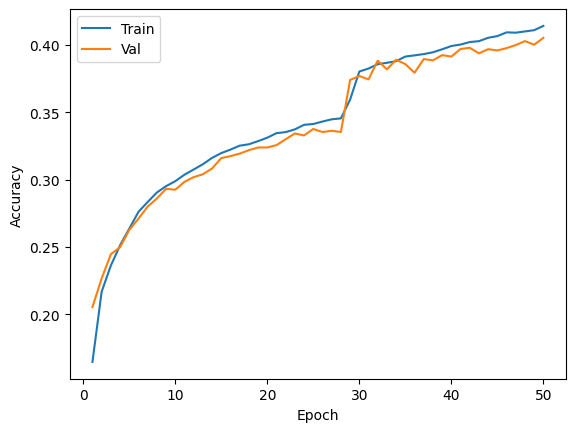

In [ ]:
PlotGraph(Epoch_List, TrainAcc_List, ValAcc_List)

In [ ]:
# -------------------------------------------- CIFAR-10 Dataset with 100% Randomness -----------------------------------------------------------
Option = 7
Train_DataLoader, Val_DataLoader, Test_DataLoader = CreateDataLoaders(Option, 64, RandomNoisePerc=1)
ModelName = "Model_AllConv_CIFAR10_R100.pt"

model = AllConv(10).to(device)
loss_criteria = nn.CrossEntropyLoss()
AdamOpt = torch.optim.Adam(model.parameters(), lr=0.0001)

ValAccuracy = 0
TrainAcc_List = []
ValAcc_List = []

saved = False
if saved == True:
    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)
else:
    model.train()
    Train_Accuracy = 0

    for e in range(EPOCHS):
        Train_Accuracy = TrainModel(model, loss_criteria, AdamOpt, device, Train_DataLoader)
        val_acc = EvaluateModel(model, Val_DataLoader, device)

        TrainAcc_List.append(Train_Accuracy.cpu().item())
        ValAcc_List.append(val_acc.cpu().item())

        print("EPOCH - ", e+1, ". Train Accuracy = ", Train_Accuracy.cpu().item(), ", Validation Accuracy = ", val_acc.cpu().item())
        
        if val_acc.cpu().item() > ValAccuracy:
            print("Model Re-Saved")
            ValAccuracy = val_acc.cpu().item()
            torch.save(model, ModelName)

    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)


print()

Train_Accuracy = EvaluateModel(saved_model, Train_DataLoader, device)
print("Train Accuracy = ", Train_Accuracy.cpu().item())
Test_Accuracy = EvaluateModel(saved_model, Test_DataLoader, device)
print("Test Accuracy = ", Test_Accuracy.cpu().item())

print("Generalization Gap = ", (Train_Accuracy.cpu().item() - Test_Accuracy.cpu().item()))

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 118/118 [00:01<00:00, 91.95it/s]


EPOCH -  1 . Train Accuracy =  0.19748234748840332 , Validation Accuracy =  0.2762666642665863
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 90.40it/s]


EPOCH -  2 . Train Accuracy =  0.2892235219478607 , Validation Accuracy =  0.2894666790962219
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.46it/s]


EPOCH -  3 . Train Accuracy =  0.31338822841644287 , Validation Accuracy =  0.3242666721343994
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.30it/s]


EPOCH -  4 . Train Accuracy =  0.33334118127822876 , Validation Accuracy =  0.3483999967575073
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 77.64it/s]


EPOCH -  5 . Train Accuracy =  0.3528705835342407 , Validation Accuracy =  0.36239999532699585
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 78.90it/s]


EPOCH -  6 . Train Accuracy =  0.36992940306663513 , Validation Accuracy =  0.3729333281517029
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.89it/s]


EPOCH -  7 . Train Accuracy =  0.384023517370224 , Validation Accuracy =  0.3770666718482971
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.79it/s]


EPOCH -  8 . Train Accuracy =  0.39672940969467163 , Validation Accuracy =  0.39453333616256714
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.09it/s]


EPOCH -  9 . Train Accuracy =  0.4055529534816742 , Validation Accuracy =  0.41040000319480896
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.08it/s]


EPOCH -  10 . Train Accuracy =  0.41519999504089355 , Validation Accuracy =  0.42053332924842834
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 69.71it/s]


EPOCH -  11 . Train Accuracy =  0.4229411780834198 , Validation Accuracy =  0.4236000180244446
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.84it/s]


EPOCH -  12 . Train Accuracy =  0.42665883898735046 , Validation Accuracy =  0.4262666702270508
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.59it/s]


EPOCH -  13 . Train Accuracy =  0.4320235252380371 , Validation Accuracy =  0.4297333359718323
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.52it/s]


EPOCH -  14 . Train Accuracy =  0.4347764849662781 , Validation Accuracy =  0.43826666474342346
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.81it/s]


EPOCH -  15 . Train Accuracy =  0.43868234753608704 , Validation Accuracy =  0.4300000071525574


100%|██████████| 118/118 [00:01<00:00, 91.52it/s]


EPOCH -  16 . Train Accuracy =  0.44244706630706787 , Validation Accuracy =  0.44333332777023315
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 65.77it/s]


EPOCH -  17 . Train Accuracy =  0.44745883345603943 , Validation Accuracy =  0.44306668639183044


100%|██████████| 118/118 [00:01<00:00, 93.99it/s]


EPOCH -  18 . Train Accuracy =  0.4479529559612274 , Validation Accuracy =  0.43986666202545166


100%|██████████| 118/118 [00:01<00:00, 92.96it/s]


EPOCH -  19 . Train Accuracy =  0.45042353868484497 , Validation Accuracy =  0.4389333426952362


100%|██████████| 118/118 [00:01<00:00, 88.77it/s]


EPOCH -  20 . Train Accuracy =  0.4523294270038605 , Validation Accuracy =  0.45399999618530273
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.29it/s]


EPOCH -  21 . Train Accuracy =  0.4564000070095062 , Validation Accuracy =  0.45000001788139343


100%|██████████| 118/118 [00:01<00:00, 92.74it/s]


EPOCH -  22 . Train Accuracy =  0.45872941613197327 , Validation Accuracy =  0.4590666592121124
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 63.32it/s]


EPOCH -  23 . Train Accuracy =  0.4610823690891266 , Validation Accuracy =  0.4566666781902313


100%|██████████| 118/118 [00:01<00:00, 92.09it/s]


EPOCH -  24 . Train Accuracy =  0.46385881304740906 , Validation Accuracy =  0.4565333425998688


100%|██████████| 118/118 [00:01<00:00, 90.06it/s]


EPOCH -  25 . Train Accuracy =  0.46703529357910156 , Validation Accuracy =  0.4480000138282776


100%|██████████| 118/118 [00:01<00:00, 91.30it/s]


EPOCH -  26 . Train Accuracy =  0.46835294365882874 , Validation Accuracy =  0.47040000557899475
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.24it/s]


EPOCH -  27 . Train Accuracy =  0.4704705774784088 , Validation Accuracy =  0.4670666754245758


100%|██████████| 118/118 [00:01<00:00, 91.53it/s]


EPOCH -  28 . Train Accuracy =  0.47315293550491333 , Validation Accuracy =  0.467600017786026


100%|██████████| 118/118 [00:01<00:00, 66.11it/s]


EPOCH -  29 . Train Accuracy =  0.4725882411003113 , Validation Accuracy =  0.4713333249092102
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.06it/s]


EPOCH -  30 . Train Accuracy =  0.47729411721229553 , Validation Accuracy =  0.47306665778160095
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.82it/s]


EPOCH -  31 . Train Accuracy =  0.47901177406311035 , Validation Accuracy =  0.4638666808605194


100%|██████████| 118/118 [00:01<00:00, 92.03it/s]


EPOCH -  32 . Train Accuracy =  0.48169413208961487 , Validation Accuracy =  0.4801333248615265
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 88.84it/s]


EPOCH -  33 . Train Accuracy =  0.48491764068603516 , Validation Accuracy =  0.47679999470710754


100%|██████████| 118/118 [00:01<00:00, 90.84it/s]


EPOCH -  34 . Train Accuracy =  0.4856705963611603 , Validation Accuracy =  0.4828000068664551
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 65.31it/s]


EPOCH -  35 . Train Accuracy =  0.4868941307067871 , Validation Accuracy =  0.47573333978652954


100%|██████████| 118/118 [00:01<00:00, 93.64it/s]


EPOCH -  36 . Train Accuracy =  0.4892941117286682 , Validation Accuracy =  0.48213332891464233


100%|██████████| 118/118 [00:01<00:00, 90.92it/s]


EPOCH -  37 . Train Accuracy =  0.49101176857948303 , Validation Accuracy =  0.4858666658401489
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.18it/s]


EPOCH -  38 . Train Accuracy =  0.4924705922603607 , Validation Accuracy =  0.4842666685581207


100%|██████████| 118/118 [00:01<00:00, 92.02it/s]


EPOCH -  39 . Train Accuracy =  0.4943764805793762 , Validation Accuracy =  0.4829333424568176


100%|██████████| 118/118 [00:01<00:00, 83.04it/s]


EPOCH -  40 . Train Accuracy =  0.4987058937549591 , Validation Accuracy =  0.4880000054836273
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 61.47it/s]


EPOCH -  41 . Train Accuracy =  0.4978823661804199 , Validation Accuracy =  0.48919999599456787
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 84.68it/s]


EPOCH -  42 . Train Accuracy =  0.4987058937549591 , Validation Accuracy =  0.4912000000476837
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 90.99it/s]


EPOCH -  43 . Train Accuracy =  0.5014352798461914 , Validation Accuracy =  0.4877333343029022


100%|██████████| 118/118 [00:01<00:00, 90.48it/s]


EPOCH -  44 . Train Accuracy =  0.5040470361709595 , Validation Accuracy =  0.49639999866485596
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.77it/s]


EPOCH -  45 . Train Accuracy =  0.5048470497131348 , Validation Accuracy =  0.4914666712284088


100%|██████████| 118/118 [00:01<00:00, 88.28it/s]


EPOCH -  46 . Train Accuracy =  0.5076941251754761 , Validation Accuracy =  0.4898666739463806


100%|██████████| 118/118 [00:01<00:00, 73.14it/s]


EPOCH -  47 . Train Accuracy =  0.5102353096008301 , Validation Accuracy =  0.4968000054359436
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 80.79it/s]


EPOCH -  48 . Train Accuracy =  0.5091294050216675 , Validation Accuracy =  0.4992000162601471
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 90.83it/s]


EPOCH -  49 . Train Accuracy =  0.5117882490158081 , Validation Accuracy =  0.5054666996002197
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.87it/s]


EPOCH -  50 . Train Accuracy =  0.515223503112793 , Validation Accuracy =  0.5006666779518127



100%|██████████| 665/665 [00:08<00:00, 82.54it/s]


Train Accuracy =  0.5199529528617859


100%|██████████| 157/157 [00:01<00:00, 93.48it/s]

Test Accuracy =  0.5054999589920044
Generalization Gap =  0.014452993869781494


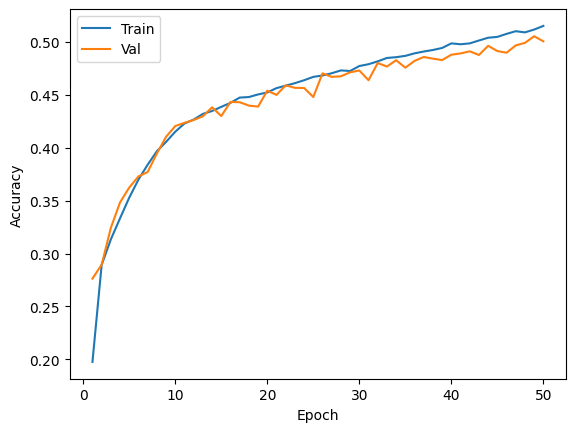

In [ ]:
PlotGraph(Epoch_List, TrainAcc_List, ValAcc_List)